<a href="https://colab.research.google.com/github/nico876987/TP2.1/blob/main/DESAFIO_NICOLAS_LUTRI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

Cargar el archivo

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_scout_not_dummy.csv to final_scout_not_dummy.csv


Leer el archivo

In [ ]:
df_train = pd.read_csv("final_scout_not_dummy.csv")

**Abstract del Dataset**

El dataset contiene información detallada sobre automóviles en venta, recopilada a partir de anuncios de venta de vehículos usados. Incluye variables como modelo, tipo de carrocería, precio, kilometraje, tipo de combustible, potencia del motor, antigüedad y otros aspectos que permiten analizar patrones de precio y características técnicas de los vehículos. El objetivo principal de este análisis es identificar tendencias en el mercado de automóviles usados, como la relación entre potencia y consumo de combustible, así como los factores que influyen en el precio.

Describe()

In [ ]:
df_train.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


Exploracion inicial de los datos

In [ ]:
print(f' Filas y Columnas: {df_train.shape}')
df_train.info()
print("\nDescripción:")
print(df_train.describe())

 Filas y Columnas: (15915, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspe

Valores Nulos

In [ ]:
nulos_por_columna = df_train.isnull().sum()
print(f"\nCantidad de valores nulos por columna:\n{nulos_por_columna}")


Cantidad de valores nulos por columna:
make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64


Filas duplicadas

In [ ]:
duplicados = df_train[df_train.duplicated()]
print(f"\nSe repiten {duplicados.shape[0]} filas")


Se repiten 1673 filas


Variables:

- make_model: Modelo y marca del vehículo
- body_type: Tipo de carrocería del vehículo
- price: Precio de venta del vehículo (en euros)
- vat: Tipo de IVA aplicado en el precio
- km: Kilómetros recorridos por el vehículo
- Type: Tipo de vehículo
- Fuel: Tipo de combustible utilizado
- Gears: Número de marchas del vehículo
- Comfort_Convenience: Características relacionadas con la comodidad
- Entertainment_Media: Opciones de entretenimiento y medios
- Extras: Características adicionales
- Safety_Security: Características de seguridad
- age: Antig0üedad del vehículo en años
- Previous_Owners: Número de propietarios anteriores
- hp_kW: Potencia del motor en kilovatios
- Inspection_new: Indicador de inspección reciente
- Paint_Type: Tipo de pintura del vehículo
- Upholstery_type: Tipo de tapicería
- Gearing_Type: Tipo de cambio
- Displacement_cc: Cilindrada del motor
- Weight_kg: Peso del vehículo
- cons_comb: Consumo combinado de combustible



**Variables mas relevantes:**

Precio de venta: Casi todos los análisis en el presente tienen que ver con el precio y la influencia de otras variables en él.

km: Se analiza también la importancia de los km. recorridos en el precio.

Type: Se buscará información sobre la influencia del tipo de vehículo en el precio.

Fuel: También se busca conocer la incidencia del tipo de combustible

Previous_Ouners: para entender la incidencia de los propietarios anteriores en el precio

hp_kW: Entender si la potencia del motor incide en el precio

Paint_Type - Upholstery_type: Investigar la incidencia de la estética en el precio

Gearing_Type: Ver cuanto afecta el tipo de cambio (marcha) en el precio

Distribucion de precios

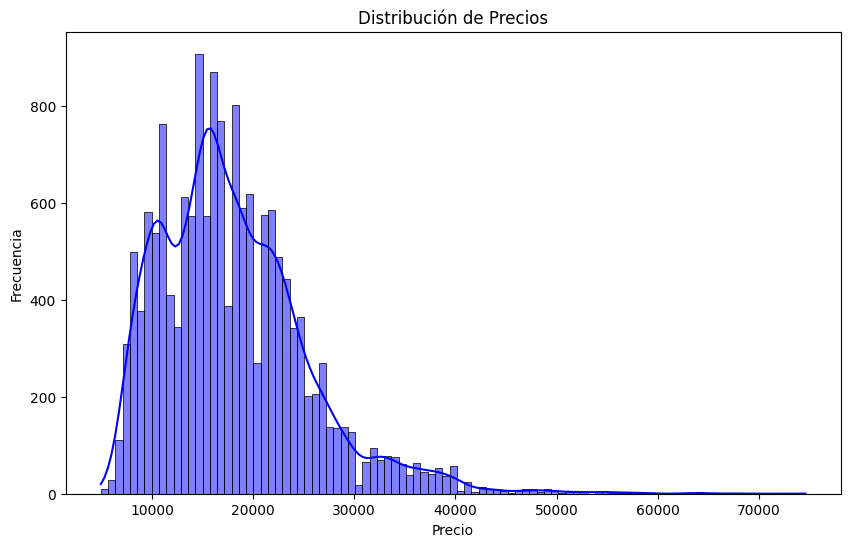

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['price'], kde=True, color='blue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


La distribución de precios muestra que la mayoría de los autos usados tienen un precio entre 10,000 y 20,000 euros.

Relacion entre kilometros y precio

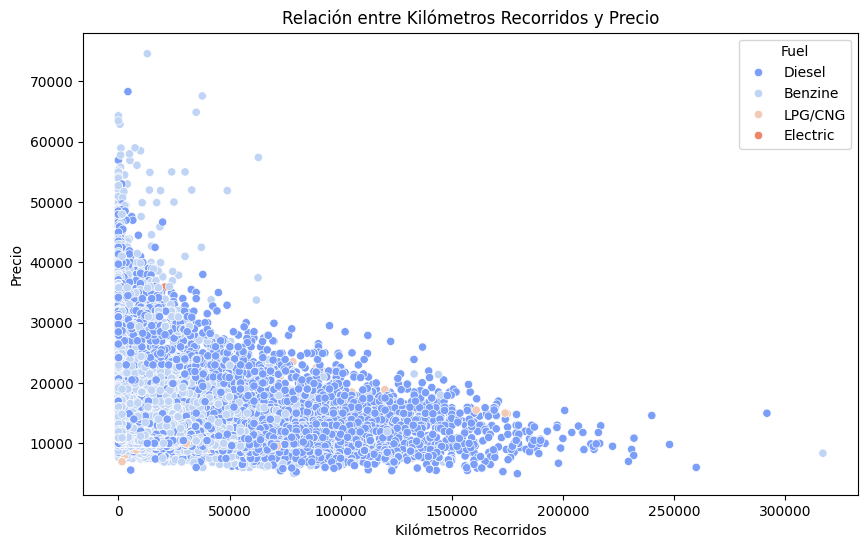

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='km', y='price', hue='Fuel', palette='coolwarm')
plt.title('Relación entre Kilómetros Recorridos y Precio')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio')
plt.show()

Existe una correlación negativa entre el kilometraje y el precio.

Cantidad de vehiculos por tipo de combustible

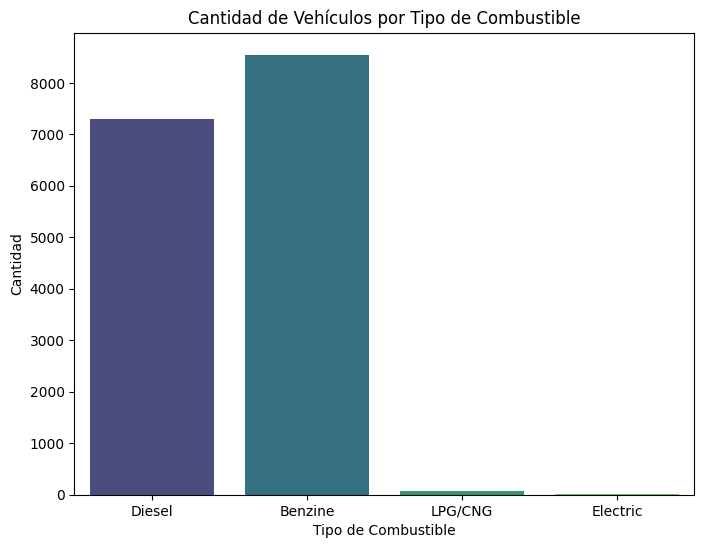

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Fuel', palette='viridis')
plt.title('Cantidad de Vehículos por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.show()


Existe una mayor cantidad de autos que funcionan con nafta, aunque son poco menos los que lo hacen con diesel. Una porción mínima ocupa GNC y, en la muestra, no se encuentran vehículos eléctricos

Relacion entre caballos de potencia y precio

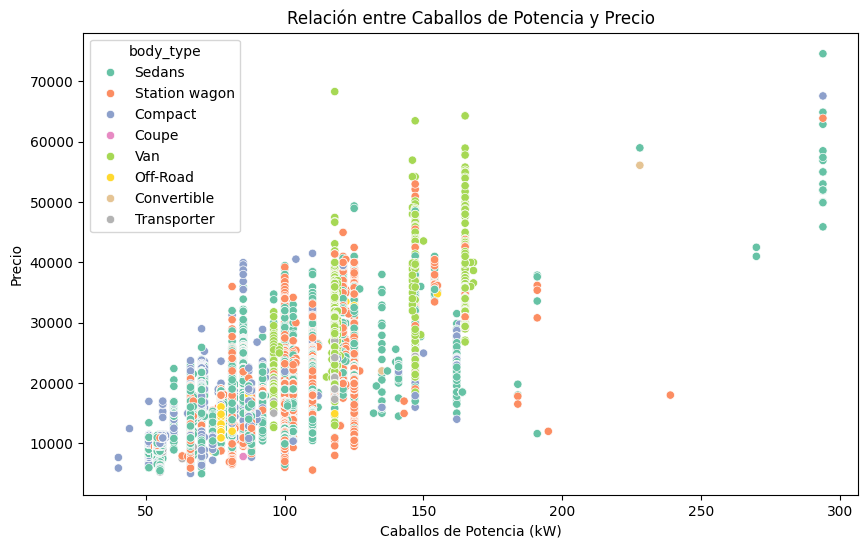

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='hp_kW', y='price', hue='body_type', palette='Set2')
plt.title('Relación entre Caballos de Potencia y Precio')
plt.xlabel('Caballos de Potencia (kW)')
plt.ylabel('Precio')
plt.show()


Los vehículos mas potentes tienden a ser mas caros

Los autos más potentes tienden a ser más caros y consumir más combustible.

**Relación entre el peso del vehículo y su consumo de combustible**

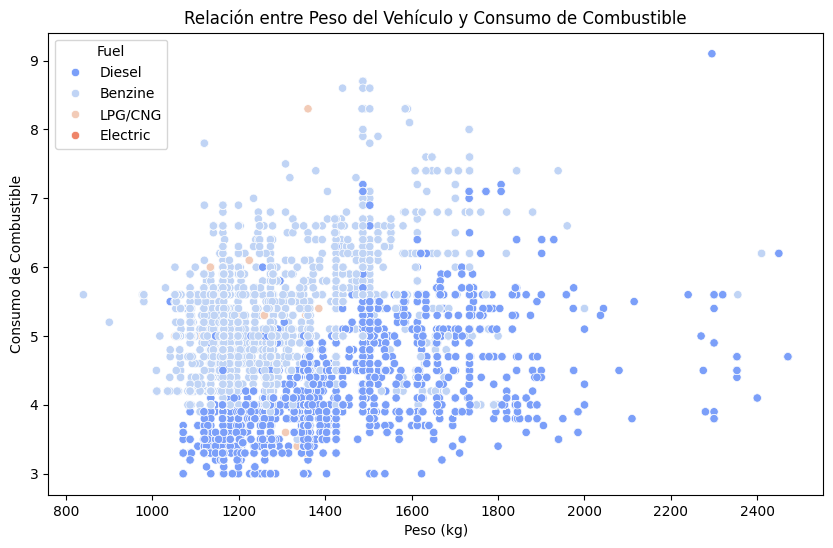

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='Weight_kg', y='cons_comb', hue='Fuel', palette='coolwarm')
plt.title('Relación entre Peso del Vehículo y Consumo de Combustible')
plt.xlabel('Peso (kg)')
plt.ylabel('Consumo de Combustible')
plt.show()

Existe una correlación positiva entre el peso del vehículo y su consumo de combustible. Los vehículos más pesados tienden a consumir más combustible.

Precio promedio por tipo de vehiculo

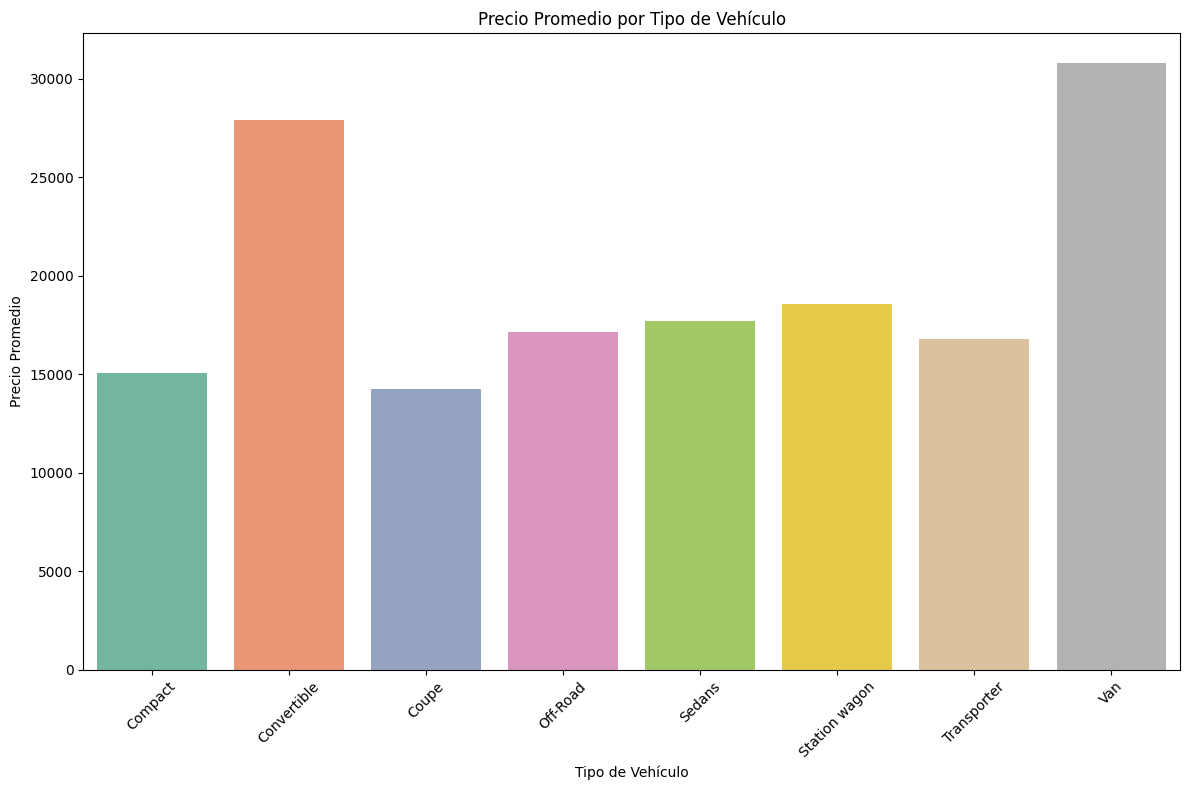

In [ ]:
plt.figure(figsize=(12, 8))
mean_prices = df_train.groupby('body_type')['price'].mean().reset_index()
sns.barplot(data=mean_prices, x='body_type', y='price', palette='Set2')
plt.title('Precio Promedio por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Los precios de las Van y los Convertibles son considerablemente mas elevados que el resto. Los demás, si bien tienen precios similares, son los Coupe y los Compact levemente mas económicos

 Número de vehículos según el tipo de cambio (Gearing_Type)

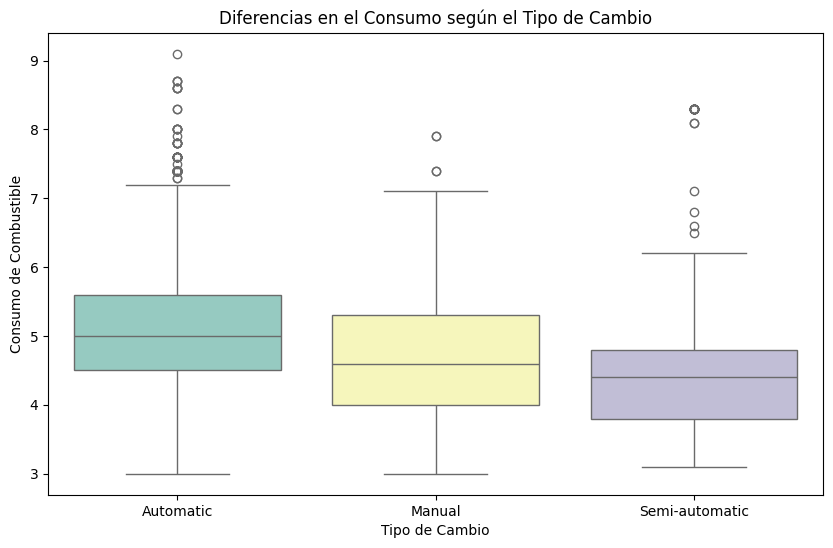

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Gearing_Type', y='cons_comb', palette='Set3')
plt.title('Diferencias en el Consumo según el Tipo de Cambio')
plt.xlabel('Tipo de Cambio')
plt.ylabel('Consumo de Combustible')
plt.show()


No se observan diferencias significativas en el consumo de combustible según el tipo de cambio del vehículo.

**Interpretación de Resultados**

La distribución de precios muestra que la mayoría de los autos usados tienen un precio entre 10,000 y 20,000 euros.

Existe una correlación negativa entre el kilometraje y el precio.

Los autos más potentes tienden a ser más caros y consumir más combustible.

**Relación entre cantidad de propietarios anteriores y precio**

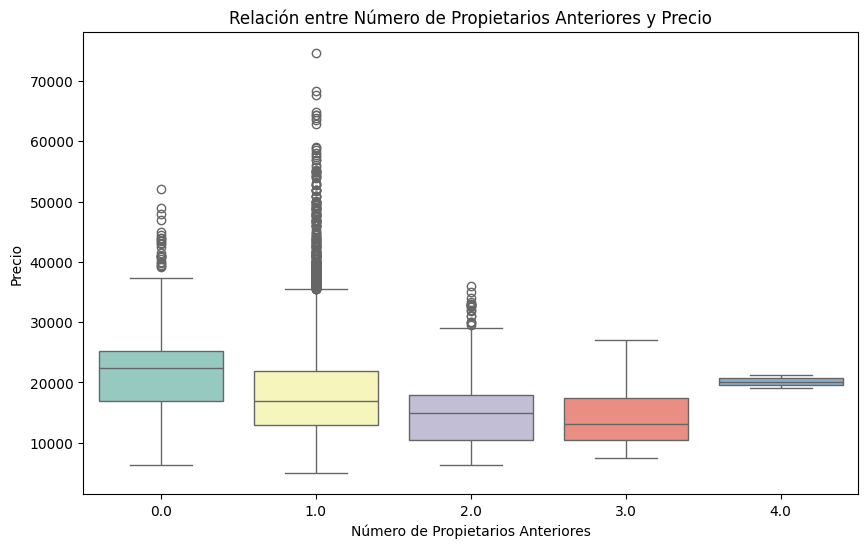

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Previous_Owners', y='price', palette='Set3')
plt.title('Relación entre Número de Propietarios Anteriores y Precio')
plt.xlabel('Número de Propietarios Anteriores')
plt.ylabel('Precio')
plt.show()

Los vehículos con menos propietarios anteriores tienden a tener un precio más alto, aunque la diferencia no es muy significativa

**Relación entre la estética (pintura y tapicería) y el precio**

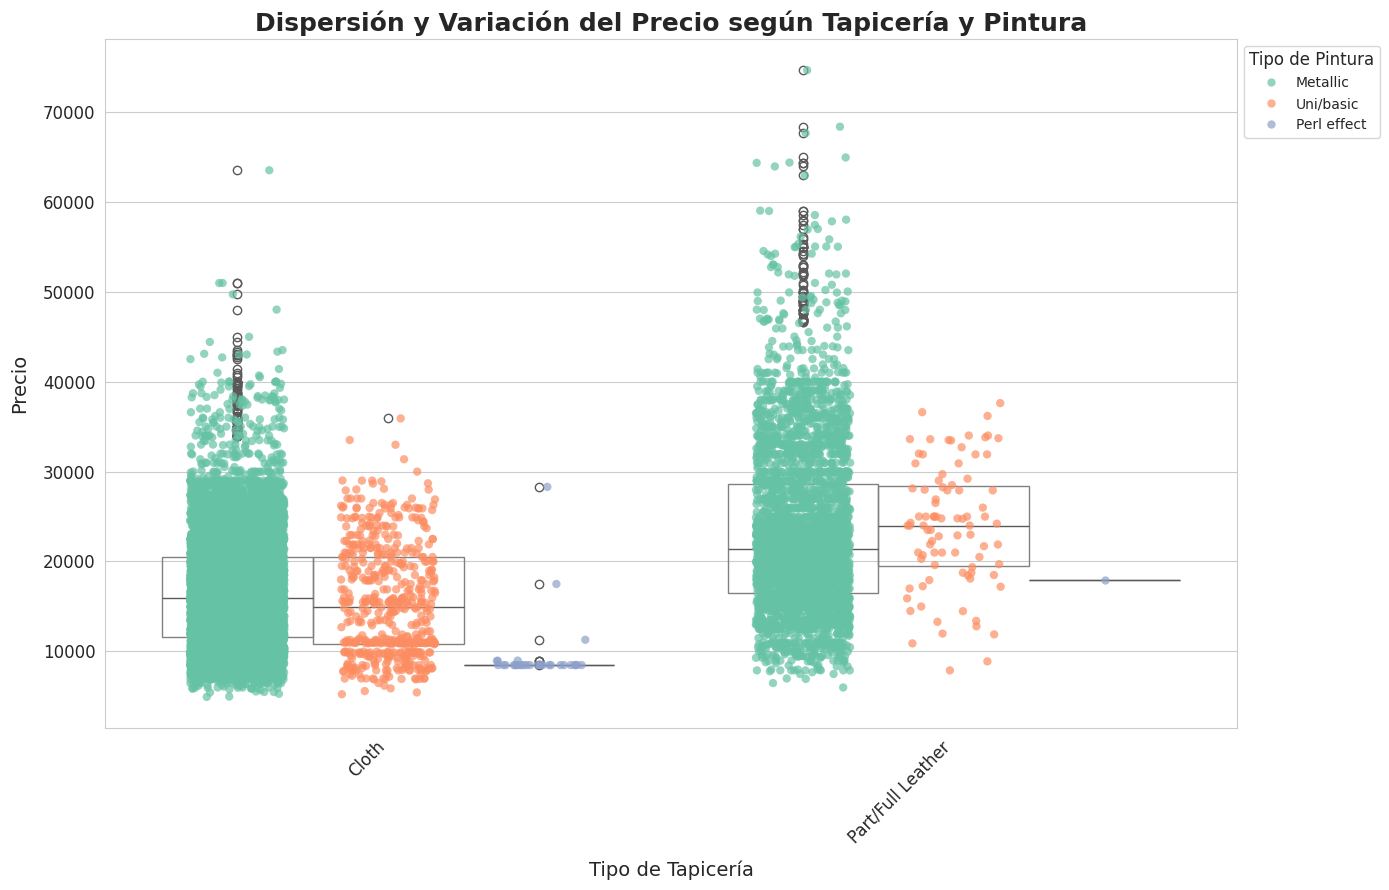

In [ ]:
plt.figure(figsize=(14, 9))
sns.set_style("whitegrid")

# Agrega un boxplot como fondo para dar contexto
sns.boxplot(
    data=df_train,
    x='Upholstery_type',
    y='price',
    hue='Paint_Type',
    palette='Set2',
    showcaps=False,
    boxprops={'facecolor': 'None', 'edgecolor': 'gray'},  # Hacer las cajas transparentes
    whiskerprops={'linewidth': 0},  # Ocultar bigotes
    zorder=1
)

# Agrega el stripplot para mostrar puntos individuales
sns.stripplot(
    data=df_train,
    x='Upholstery_type',
    y='price',
    hue='Paint_Type',
    dodge=True,
    palette='Set2',
    alpha=0.7,
    size=6,
    jitter=0.25,  # Agrega un poco de desplazamiento horizontal
    zorder=2
)

plt.title('Dispersión y Variación del Precio según Tapicería y Pintura', fontsize=18, weight='bold')
plt.xlabel('Tipo de Tapicería', fontsize=14, labelpad=10)
plt.ylabel('Precio', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

# Ajusta la leyenda para evitar duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Tipo de Pintura', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


El precio varía según el tipo de tapicería y pintura, aunque no se observa una tendencia clara.

1¿Cómo influye la antiguedad del auto en su potencia?

La antigüedad del auto no parece influir significativamente en su potencia, aunque los autos más nuevos tienden a tener una potencia ligeramente mayor.

2¿Hay alguna relación entre la potencia del motor y el consumo de combustible?

Existe una correlación positiva entre la potencia del motor y el consumo de combustible. Los autos más potentes tienden a consumir más combustible.

3¿Será que los autos más potentes consumen más?

Sí, los autos más potentes tienden a consumir más combustible, como se observa en el punto anterior.

4¿Cuál es la relación entre el peso del vehículo y su consumo de combustible?

Existe una correlación positiva entre el peso del vehículo y su consumo de combustible. Los vehículos más pesados tienden a consumir más combustible.

5¿Los vehículos con menos propietarios anteriores tienen un precio más alto?

Los vehículos con menos propietarios anteriores tienden a tener un precio más alto, aunque la diferencia no es muy significativa

6¿Cómo varía el precio según la tapicería y la pintura?

El precio varía según el tipo de tapicería y pintura, aunque no se observa una tendencia clara.

7¿Hay diferencias en el consumo según el tipo de cambio del vehículo?

No se observan diferencias significativas en el consumo de combustible según el tipo de cambio del vehículo.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear un dashboard con Plotly
fig = make_subplots(rows=2, cols=2, subplot_titles=("Distribución de Precios", "Relación entre Potencia y Consumo", "Precio Promedio por Tipo de Vehículo", "Consumo de Combustible por Tipo de Cambio"))

# Distribución de Precios
fig.add_trace(go.Histogram(x=df_train['price'], nbinsx=50, name='Precio'), row=1, col=1)

# Relación entre Potencia y Consumo
fig.add_trace(go.Scatter(x=df_train['hp_kW'], y=df_train['cons_comb'], mode='markers', name='Potencia vs Consumo'), row=1, col=2)

# Precio Promedio por Tipo de Vehículo
mean_prices = df_train.groupby('body_type')['price'].mean().reset_index()
fig.add_trace(go.Bar(x=mean_prices['body_type'], y=mean_prices['price'], name='Precio Promedio'), row=2, col=1)

# Consumo de Combustible por Tipo de Cambio
fig.add_trace(go.Box(x=df_train['Gearing_Type'], y=df_train['cons_comb'], name='Consumo por Tipo de Cambio'), row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Dashboard de Análisis de Automóviles Usados")
fig.show()

**Conclusión Final:**

El análisis del dataset de automóviles usados nos permite identificar varias tendencias y relaciones entre las variables. Se observa que los vehículos más potentes tienden a ser más caros y consumir más combustible. Además, el peso del vehículo y el tipo de combustible también influyen en el consumo. Los vehículos con menos propietarios anteriores tienden a tener un precio más alto, aunque la diferencia no es muy significativa. Finalmente, no se observan diferencias significativas en el consumo de combustible según el tipo de cambio del vehículo.

Este análisis puede ser útil para los compradores de automóviles usados, ya que les permite entender mejor los factores que influyen en el precio y el consumo de combustible, lo que puede ayudar en la toma de decisiones de compra.